In [1]:
import warnings
warnings.filterwarnings("ignore")

import env
import Liam_wrangle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import viz_kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('train_zillow.csv')

In [3]:
def split_zillow(df):
    '''This fuction takes in a df 
    splits into train, test, validate
    return: three pandas dataframes: train, validate, test
    '''
    # split the focused zillow data
    train_validate, test = train_test_split(df, test_size=.2, random_state=1234)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=1234)
    return train, validate, test

In [4]:
train, validate, test = split_zillow(df)

In [5]:
def scale_my_data(train, validate, test):
    scale_columns = ['bathrooms', 'bedrooms', 'quality', 
              'square_feet', 'full_bathrooms', 
              'latitude', 'longitude', 'lot_square_feet',  
              'land_type', 'city', 'county', 'zip_code', 
             'room_count', 'unitcnt', 'structure_tax_value', 
             'tax_value',  'land_tax_value', 'taxamount',
              'house_age', 'tax_rate', 'acres']
    scaler = MinMaxScaler()
    scaler.fit(train[scale_columns])

    train_scaled = scaler.transform(train[scale_columns])
    validate_scaled = scaler.transform(validate[scale_columns])
    test_scaled = scaler.transform(test[scale_columns])
    #turn into dataframe
    train_scaled = pd.DataFrame(train_scaled)
    validate_scaled = pd.DataFrame(validate_scaled)
    test_scaled = pd.DataFrame(test_scaled)
    
    return train_scaled, validate_scaled, test_scaled

In [6]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [7]:
train_scaled, validate_scaled, test_scaled = scale_my_data(train, validate, test)

In [8]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [9]:
kmeans = KMeans(n_clusters=5, random_state=123)

In [10]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [11]:
# identify columns we want to cluster on
cluster_cols = ['longitude', 'latitude', 'house_age']

In [12]:
# clustering on train, getting the cetnoids
kmeans = kmeans.fit(train[cluster_cols])

In [13]:
# identifying clusters in train
train['longitude_latitude_houseage_cluster'] = kmeans.predict(train[cluster_cols])

In [14]:
# identifying clusters in validate, test
validate['longitude_latitude_houseage_cluster'] = kmeans.predict(validate[cluster_cols])
test['longitude_latitude_houseage_cluster'] = kmeans.predict(test[cluster_cols])

In [15]:
def predict_cluster(some_dataframe):
    some_dataframe['longitude_latitude_houseage_cluster'] = kmeans.predict(some_dataframe[cluster_cols])
    return some_dataframe

In [16]:
# look at overall counts of observations by cluster
train.longitude_latitude_houseage_cluster.value_counts()

0    6466
1    4855
4    3885
3    1398
2    1115
Name: longitude_latitude_houseage_cluster, dtype: int64

In [17]:
# look at overall counts of observations by cluster
validate.longitude_latitude_houseage_cluster.value_counts()

0    2845
1    2003
4    1653
3     624
2     469
Name: longitude_latitude_houseage_cluster, dtype: int64

In [18]:
# look at overall counts of observations by cluster
test.longitude_latitude_houseage_cluster.value_counts()

0    2334
1    1747
4    1335
3     545
2     368
Name: longitude_latitude_houseage_cluster, dtype: int64

In [19]:
def get_dummy_longitude_latitude_houseage_cluster(some_dataframe):
    dummy_df =  pd.get_dummies(some_dataframe['longitude_latitude_houseage_cluster'])
    dummy_df.columns = ['Ventura', 'Orange County', 
                    'North downtown LA', 'East downtown LA', 
                    'North LA']
    some_dataframe = pd.concat([some_dataframe, dummy_df], axis=1)
    some_dataframe = some_dataframe.drop(['Orange County', 'East downtown LA', 
                    'North downtown LA', 'longitude_latitude_houseage_cluster'], axis=1)
    return some_dataframe

In [20]:
def prep_longitude_latitude_houseage_clusters(some_dataframe):
    some_dataframe = predict_cluster(some_dataframe)
    some_dataframe = get_dummy_longitude_latitude_houseage_cluster(some_dataframe)
    return some_dataframe

In [21]:
train = prep_longitude_latitude_houseage_clusters(train)

In [22]:
validate = prep_longitude_latitude_houseage_clusters(validate)

In [23]:
test = prep_longitude_latitude_houseage_clusters(test)

In [24]:
train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
30426  14474398      261.0                   0        2.0       3.0      6.0   
12914  13836399      261.0                   0        3.0       3.0      6.0   
10957  13011105      261.0                   1        2.0       2.0      4.0   
29226  10796558      261.0                   1        3.0       3.0      7.0   
21853  11452224      261.0                   1        2.0       3.0      6.0   

       square_feet    fips  has_fireplace  full_bathrooms  ...  in_ventura  \
30426       1360.0  6059.0            1.0             2.0  ...           0   
12914       2822.0  6059.0            1.0             3.0  ...           0   
10957       1362.0  6037.0            0.0             2.0  ...           0   
29226       3173.0  6037.0            0.0             3.0  ...           0   
21853       1150.0  6037.0            0.0             2.0  ...           0   

       house_age   tax_rate     acres  level_of_log_error  square_feet_bins  \
30426       54.0  98.582075  0.183655            Accurate                 3   
12914       91.0  71.997341  0.273990            Accurate                 6   
10957       73.0  56.093635  0.175092            Accurate                 3   
29226       65.0  82.468627  0.419949            Accurate                 7   
21853       68.0  73.683481  0.122934            Accurate                 3   

       lot_sqft_bins  acre_bins  Ventura  North LA  
30426              0          0        0         1  
12914              1          0        0         1  
10957              0          0        1         0  
29226              1          0        0         0  
21853              0          0        1         0  

[5 rows x 36 columns]

In [25]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [26]:
kmeans = KMeans(n_clusters=6, random_state=123)

In [27]:
# identify columns we want to cluster on
cluster_cols = ['structure_tax_value', 'land_tax_value']

In [28]:
# clustering on train, getting the cetnoids
kmeans = kmeans.fit(train[cluster_cols])

In [29]:
# identifying clusters in train
train['taxes_cluster'] = kmeans.predict(train[cluster_cols])

In [30]:
# identifying clusters in validate, test
validate['taxes_cluster'] = kmeans.predict(validate[cluster_cols])
test['taxes_cluster'] = kmeans.predict(test[cluster_cols])

In [31]:
def predict_cluster(some_dataframe):
    some_dataframe['taxes_cluster'] = kmeans.predict(some_dataframe[cluster_cols])
    return some_dataframe

In [32]:
# look at overall counts of observations by cluster
train.taxes_cluster.value_counts()

0    6308
1    3932
4    2772
5    2578
2    1214
3     915
Name: taxes_cluster, dtype: int64

In [33]:
# look at overall counts of observations by cluster
validate.taxes_cluster.value_counts()

0    2721
1    1711
4    1153
5    1134
2     507
3     368
Name: taxes_cluster, dtype: int64

In [34]:
# look at overall counts of observations by cluster
test.taxes_cluster.value_counts()

0    2331
1    1334
4    1008
5     917
2     399
3     340
Name: taxes_cluster, dtype: int64

In [35]:
def get_dummy_taxes_cluster(some_dataframe):
    dummy_df =  pd.get_dummies(some_dataframe['taxes_cluster'])
    dummy_df.columns = ['low_structure_and_land_tax', 'drop1',
                        'drop2', 'medium_structure_low_land_tax', 
                        'drop4', 'drop5']
    some_dataframe = pd.concat([some_dataframe, dummy_df], axis=1)
    some_dataframe = some_dataframe.drop(['drop1', 'drop2', 'drop4', 'drop5', 'taxes_cluster'], axis=1)
    return some_dataframe

In [36]:
def prep_taxes_clusters(some_dataframe):
    some_dataframe = predict_cluster(some_dataframe)
    some_dataframe = get_dummy_taxes_cluster(some_dataframe)
    return some_dataframe

In [37]:
train = prep_taxes_clusters(train)

In [38]:
validate = prep_taxes_clusters(validate)

In [39]:
test = prep_taxes_clusters(test)

In [40]:
train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
30426  14474398      261.0                   0        2.0       3.0      6.0   
12914  13836399      261.0                   0        3.0       3.0      6.0   
10957  13011105      261.0                   1        2.0       2.0      4.0   
29226  10796558      261.0                   1        3.0       3.0      7.0   
21853  11452224      261.0                   1        2.0       3.0      6.0   

       square_feet    fips  has_fireplace  full_bathrooms  ...   tax_rate  \
30426       1360.0  6059.0            1.0             2.0  ...  98.582075   
12914       2822.0  6059.0            1.0             3.0  ...  71.997341   
10957       1362.0  6037.0            0.0             2.0  ...  56.093635   
29226       3173.0  6037.0            0.0             3.0  ...  82.468627   
21853       1150.0  6037.0            0.0             2.0  ...  73.683481   

          acres  level_of_log_error  square_feet_bins  lot_sqft_bins  \
30426  0.183655            Accurate                 3              0   
12914  0.273990            Accurate                 6              1   
10957  0.175092            Accurate                 3              0   
29226  0.419949            Accurate                 7              1   
21853  0.122934            Accurate                 3              0   

       acre_bins  Ventura  North LA  low_structure_and_land_tax  \
30426          0        0         1                           0   
12914          0        0         1                           1   
10957          0        1         0                           1   
29226          0        0         0                           0   
21853          0        1         0                           1   

       medium_structure_low_land_tax  
30426                              0  
12914                              0  
10957                              0  
29226                              0  
21853                              0  

[5 rows x 38 columns]

In [41]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [42]:
kmeans = KMeans(n_clusters=5, random_state=123)

In [43]:
# identify columns we want to cluster on
cluster_cols = ['quality', 'house_age', 'room_count']

In [44]:
# clustering on train, getting the cetnoids
kmeans = kmeans.fit(train[cluster_cols])

In [45]:
# identifying clusters in train
train['quality_houseage_roomcount_cluster'] = kmeans.predict(train[cluster_cols])

In [46]:
# identifying clusters in validate, test
validate['quality_houseage_roomcount_cluster'] = kmeans.predict(validate[cluster_cols])
test['quality_houseage_roomcount_cluster'] = kmeans.predict(test[cluster_cols])

In [47]:
def predict_cluster(some_dataframe):
    some_dataframe['quality_houseage_roomcount_cluster'] = kmeans.predict(some_dataframe[cluster_cols])
    return some_dataframe

In [48]:
# look at overall counts of observations by clustert
train.quality_houseage_roomcount_cluster.value_counts()

1    5261
2    4416
4    4350
0    2164
3    1528
Name: quality_houseage_roomcount_cluster, dtype: int64

In [49]:
# look at overall counts of observations by cluster
validate.quality_houseage_roomcount_cluster.value_counts()

1    2210
2    1907
4    1859
0     950
3     668
Name: quality_houseage_roomcount_cluster, dtype: int64

In [50]:
# look at overall counts of observations by cluster
test.quality_houseage_roomcount_cluster.value_counts()

1    1928
4    1542
2    1525
0     759
3     575
Name: quality_houseage_roomcount_cluster, dtype: int64

In [51]:
def get_dummy_quality_houseage_roomcount_cluster(some_dataframe):
    dummy_df =  pd.get_dummies(some_dataframe['quality_houseage_roomcount_cluster'])
    dummy_df.columns = ['house quality = 0', 
                    'Older homes low quality', 
                    'Younger homes avg. quality', 
                    'Newer Homes High Quality', 
                    'Older Homes High Quality']
    some_dataframe = pd.concat([some_dataframe, dummy_df], axis=1)
    some_dataframe = some_dataframe.drop(['Older homes low quality', 
                    'Younger homes avg. quality', 
                    'quality_houseage_roomcount_cluster'], axis=1)
    return some_dataframe

In [52]:
def prep_quality_houseage_roomcount_clusters(some_dataframe):
    some_dataframe = predict_cluster(some_dataframe)
    some_dataframe = get_dummy_quality_houseage_roomcount_cluster(some_dataframe)
    return some_dataframe

In [53]:
train = prep_quality_houseage_roomcount_clusters(train)

In [54]:
validate = prep_quality_houseage_roomcount_clusters(validate)

In [55]:
test = prep_quality_houseage_roomcount_clusters(test)

In [56]:
train.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
30426  14474398      261.0                   0        2.0       3.0      6.0   
12914  13836399      261.0                   0        3.0       3.0      6.0   
10957  13011105      261.0                   1        2.0       2.0      4.0   
29226  10796558      261.0                   1        3.0       3.0      7.0   
21853  11452224      261.0                   1        2.0       3.0      6.0   

       square_feet    fips  has_fireplace  full_bathrooms  ...  \
30426       1360.0  6059.0            1.0             2.0  ...   
12914       2822.0  6059.0            1.0             3.0  ...   
10957       1362.0  6037.0            0.0             2.0  ...   
29226       3173.0  6037.0            0.0             3.0  ...   
21853       1150.0  6037.0            0.0             2.0  ...   

       square_feet_bins  lot_sqft_bins  acre_bins  Ventura  North LA  \
30426                 3              0          0        0         1   
12914                 6              1          0        0         1   
10957                 3              0          0        1         0   
29226                 7              1          0        0         0   
21853                 3              0          0        1         0   

       low_structure_and_land_tax  medium_structure_low_land_tax  \
30426                           0                              0   
12914                           1                              0   
10957                           1                              0   
29226                           0                              0   
21853                           1                              0   

       house quality = 0  Newer Homes High Quality  Older Homes High Quality  
30426                  0                         0                         1  
12914                  0                         1                         0  
10957                  0                         0                         0  
29226                  0                         0                         0  
21853                  0                         0                         0  

[5 rows x 41 columns]

In [57]:
validate.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
5399   13028304      261.0                   1        2.0       4.0      6.0   
25887  13906081      261.0                   1        2.0       3.0      6.0   
22607  12783918      261.0                   1        3.0       3.0      7.0   
20887  13871007      261.0                   0        1.5       3.0      6.0   
29727  10865377      261.0                   1        2.0       2.0      8.0   

       square_feet    fips  has_fireplace  full_bathrooms  ...  \
5399        1284.0  6037.0            0.0             2.0  ...   
25887       1958.0  6059.0            1.0             2.0  ...   
22607       1975.0  6037.0            0.0             3.0  ...   
20887       1339.0  6059.0            0.0             1.0  ...   
29727       1504.0  6037.0            0.0             2.0  ...   

       square_feet_bins  lot_sqft_bins  acre_bins  Ventura  North LA  \
5399                  3              0          0        1         0   
25887                 4              0          0        1         0   
22607                 4              0          0        1         0   
20887                 3              0          0        1         0   
29727                 4              1          0        0         0   

       low_structure_and_land_tax  medium_structure_low_land_tax  \
5399                            1                              0   
25887                           0                              0   
22607                           0                              0   
20887                           0                              0   
29727                           0                              0   

       house quality = 0  Newer Homes High Quality  Older Homes High Quality  
5399                   0                         0                         0  
25887                  0                         0                         0  
22607                  0                         0                         1  
20887                  0                         0                         0  
29727                  0                         0                         1  

[5 rows x 41 columns]

In [58]:
test.head()

parcelid  land_type  has_heating_system  bathrooms  bedrooms  quality  \
16700  11510135      261.0                   1        2.0       3.0      4.0   
25391  12525391      266.0                   1        1.0       1.0      8.0   
17490  10992007      261.0                   1        2.0       3.0      6.0   
1418   12111117      266.0                   1        1.0       0.0      6.0   
13676  12379136      261.0                   1        3.0       3.0      6.0   

       square_feet    fips  has_fireplace  full_bathrooms  ...  \
16700       1388.0  6037.0            0.0             2.0  ...   
25391        825.0  6037.0            0.0             1.0  ...   
17490       1446.0  6037.0            0.0             2.0  ...   
1418         538.0  6037.0            0.0             1.0  ...   
13676       1610.0  6037.0            0.0             3.0  ...   

       square_feet_bins  lot_sqft_bins  acre_bins  Ventura  North LA  \
16700                 3              0          0        1         0   
25391                 2              7          1        1         0   
17490                 3              2          0        0         0   
1418                  2              3          0        1         0   
13676                 4              0          0        1         0   

       low_structure_and_land_tax  medium_structure_low_land_tax  \
16700                           1                              0   
25391                           0                              0   
17490                           0                              0   
1418                            0                              0   
13676                           0                              0   

       house quality = 0  Newer Homes High Quality  Older Homes High Quality  
16700                  0                         0                         1  
25391                  0                         0                         1  
17490                  0                         0                         0  
1418                   1                         0                         0  
13676                  0                         0                         0  

[5 rows x 41 columns]

In [59]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [60]:
def focused_zillow(train, validate, test):
    '''
    takes in train
    sets sepecific features to focus on
    returns a focused data frame in a pandas dataframe
    '''
    # choose features to focus on
    features = [
    'logerror',
    'latitude',
    'longitude',
    'Ventura',
    'North LA',
    'low_structure_and_land_tax',
    'medium_structure_low_land_tax',
    'house quality = 0',
    'Newer Homes High Quality',
    'Older Homes High Quality'] # the target
    # return a df based only on these features
    train = train[features]
    validate = validate[features]
    test = test[features]
    return train, validate, test

In [61]:
train, validate, test = focused_zillow(train, validate, test)

In [92]:
X_train.head()

latitude    longitude  Ventura  North LA  low_structure_and_land_tax  \
30426  33611146.0 -117673244.0        0         1                           0   
12914  33761560.0 -117874524.0        0         1                           1   
10957  34073575.0 -118063127.0        1         0                           1   
29226  34179756.0 -118567558.0        0         0                           0   
21853  33869572.0 -118322437.0        1         0                           1   

       medium_structure_low_land_tax  house quality = 0  \
30426                              0                  0   
12914                              0                  0   
10957                              0                  0   
29226                              0                  0   
21853                              0                  0   

       Newer Homes High Quality  Older Homes High Quality  
30426                         0                         1  
12914                         1                         0  
10957                         0                         0  
29226                         0                         0  
21853                         0                         0

# Modeling

In [63]:
def split_train_validate_test(train, validate, test):
    ''' This function takes in train, validate and test
    splits them into X and y versions
    returns X_train, X_validate, X_test, y_train, y_validate, y_test'''
    X_train = train.drop(columns = ['logerror'])
    y_train = train.logerror
    X_validate = validate.drop(columns=['logerror'])
    y_validate = validate.logerror
    X_test = test.drop(columns=['logerror'])
    y_test = test.logerror
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [64]:
X_train, X_validate, X_test, y_train, y_validate, y_test = split_train_validate_test(train, validate, test)

In [65]:
X_train.head()

latitude    longitude  Ventura  North LA  low_structure_and_land_tax  \
30426  33611146.0 -117673244.0        0         1                           0   
12914  33761560.0 -117874524.0        0         1                           1   
10957  34073575.0 -118063127.0        1         0                           1   
29226  34179756.0 -118567558.0        0         0                           0   
21853  33869572.0 -118322437.0        1         0                           1   

       medium_structure_low_land_tax  house quality = 0  \
30426                              0                  0   
12914                              0                  0   
10957                              0                  0   
29226                              0                  0   
21853                              0                  0   

       Newer Homes High Quality  Older Homes High Quality  
30426                         0                         1  
12914                         1                         0  
10957                         0                         0  
29226                         0                         0  
21853                         0                         0

In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# modeling methods
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression 

# Baseline

In [67]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
    # turn it into a single pandas dataframe
y_validate = pd.DataFrame(y_validate)
    # wrap them as dataframes
# 1. Predict appraised_value_pred_mean
    # 2 different aselines of mean and medium
logerror_pred_mean = y_train['logerror'].mean()
y_train['logerror_pred_mean'] = logerror_pred_mean
y_validate['logerror_pred_mean'] = logerror_pred_mean
# 2. compute appraised_value_pred_median
    # same process as mean (above)
logerror_pred_median = y_train['logerror'].median()
y_train['logerror_pred_median'] = logerror_pred_median
y_validate['logerror_pred_median'] = logerror_pred_median
# 3. RMSE of appraised_value_pred_mean
rmse_train_mean = mean_squared_error(y_train.logerror, 
                                     y_train.logerror_pred_mean)**(1/2)
    # stick with root mean square error
        # not your only option but that is what we will be using here
            # just because it is eaiest to us and explain
    # remember when you call you it will be your y_true and y_pred
rmse_validate_mean = mean_squared_error(y_validate.logerror, 
                                        y_validate.logerror_pred_mean)**(1/2)
    # do the same thing for the validate set as done above for the train set
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train_mean, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_mean, 2))
print(' ')
# 4. RMSE of appraised_value_pred_median
rmse_train_medium = mean_squared_error(y_train.logerror, 
                                       y_train.logerror_pred_median)**(1/2)
rmse_validate_medium = mean_squared_error(y_validate.logerror, 
                                          y_validate.logerror_pred_median)**(1/2)
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train_medium, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_medium, 2))
# median comes out a little higher than mean 
    # but a little lower than our validation set

RMSE using Mean
Train/In-Sample:  0.06 
Validate/Out-of-Sample:  0.06
 
RMSE using Median
Train/In-Sample:  0.06 
Validate/Out-of-Sample:  0.06


In [68]:
validate.sample()

logerror    latitude    longitude  Ventura  North LA  \
23494 -0.058594  34570307.0 -118174363.0        0         0   

       low_structure_and_land_tax  medium_structure_low_land_tax  \
23494                           0                              0   

       house quality = 0  Newer Homes High Quality  Older Homes High Quality  
23494                  1                         0                         0

# OLS Model

In [69]:
# create the model object
lm = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train,
# since we have converted it to a dataframe from a series!
lm.fit(X_train, y_train.logerror)
    # just call y_train.actual_target
# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train)
# evaluate: rmse
rmse_train_lm = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)
# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate)
# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)
    # make sure you are using x_validate an not x_train
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_lm,
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.060845949008003455 
Validation/Out-of-Sample:  0.0606597617286153


# Scatter Plot

In [91]:
# y_validate.head()
plt.figure(figsize=(16, 8))
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='_nolegend_')
plt.annotate("Baseline: Predict Using Median", (16, 9.5))
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="black", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm, 
            alpha=.5, color="blue", s=100, label="Model: LinearRegression")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

# LassoLars

In [71]:
# create the model object
lars = LassoLars(alpha=1.0)
    # what alpha is in this case
        # kidn of that regualizer that make lasso a little bit different
        # can go from 0 to infinity
            # it will eventually stop changing the efficivicy of you model 
                # depenind on th enumber of features being fed in
            # if alpha = 0 it is the same thing as a los model
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.logerror)
    # fit the thing
# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)
# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**1/2
# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate)
# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**1/2
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  0.001855564858174907 
Validation/Out-of-Sample:  0.0018420985277198064


# Scatter Plot

In [72]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='_nolegend_')
plt.annotate("Baseline: Predict Using Median", (16, 9.5))
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="black", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lars,
            alpha=.5, color="darkred", s=100, label="Model: LinearRegression")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Where are predictions more extreme? More modest?")

Text(0.5, 1.0, 'Where are predictions more extreme? More modest?')

# Tweedie Regressor

In [73]:
y_train.head()

logerror  logerror_pred_mean  logerror_pred_median  logerror_pred_lm  \
30426 -0.014276            0.005993              0.004999          0.009116   
12914 -0.087586            0.005993              0.004999          0.006800   
10957  0.012649            0.005993              0.004999          0.005406   
29226  0.043150            0.005993              0.004999          0.003860   
21853 -0.064356            0.005993              0.004999          0.007055   

       logerror_pred_lars  
30426            0.005993  
12914            0.005993  
10957            0.005993  
29226            0.005993  
21853            0.005993

<AxesSubplot:>

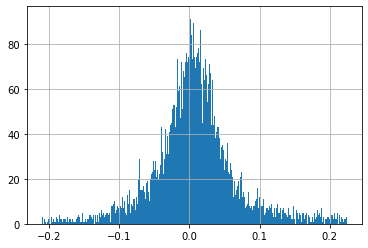

In [74]:
y_train.logerror.hist(bins = 1000)

In [75]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0) # DO not set to 1 = pison
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.logerror)
# predict train
y_train['logerror_pred_glm'] = glm.predict(X_train)
# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm)**1/2
# predict validate
y_validate['logerror_pred_glm'] = glm.predict(X_validate)
# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_glm)**1/2
print("RMSE for GLM using Tweedie, power=0 & alpha=0\nTraining/In-Sample: ", rmse_train_glm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)

RMSE for GLM using Tweedie, power=0 & alpha=0
Training/In-Sample:  0.0018549848464980514 
Validation/Out-of-Sample:  0.0018415692770739663


# Scatter Plot

In [76]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.logerror, y_validate.logerror_pred_mean, alpha=.5, color="black", label='_nolegend_')
plt.annotate("Baseline: Predict Using Median", (16, 9.5))
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="black", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_glm, 
            alpha=.5, color="darkviolet", s=100, label="Model: TweedieRegressor")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

# Ploy Degree 2 

In [77]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)
# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)
# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
    # dont call fit transform just call transform
        # we only fit train not validate
X_test_degree2 = pf.transform(X_test)

In [78]:
# create the model object
lm2 = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)
# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)
# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2)**1/2
# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)
# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2)**1/2
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_lm2, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm2)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.001837987716062547 
Validation/Out-of-Sample:  0.0018382154402148774


# Scatter Plot

In [79]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='_nolegend_')
plt.annotate("Baseline: Predict Using Median", (16, 9.5))
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="black", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm2, 
            alpha=.5, color="darkturquoise", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

# Poly Degree 3 

In [80]:
# make the polynomial features to get a new set of features
pf3 = PolynomialFeatures(degree=3)
# fit and transform X_train_scaled
X_train_degree3 = pf3.fit_transform(X_train)
# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf3.transform(X_validate)
    # dont call fit transform just call transform
        # we only fit train not validate
X_test_degree3 = pf3.transform(X_test)

In [81]:
# create the model object
lm3 = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.logerror)
# predict train
y_train['logerror_pred_lm3'] = lm3.predict(X_train_degree3)
# evaluate: rmse
rmse_train_lm3 = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2)**1/2
# predict validate
y_validate['logerror_pred_lm3'] = lm3.predict(X_validate_degree3)
# evaluate: rmse
rmse_validate_lm3 = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2)**1/2
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_lm3, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm3)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.001837987716062547 
Validation/Out-of-Sample:  0.0018382154402148774


# Scatter Plot

In [82]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='_nolegend_')
plt.annotate("Baseline: Predict Using Median", (16, 9.5))
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="black", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm3,
            alpha=.5, color="darkturquoise", s=100, label="Model 3rd degree Polynomial")
plt.legend()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

# Linear Regression

In [83]:
import numpy as np

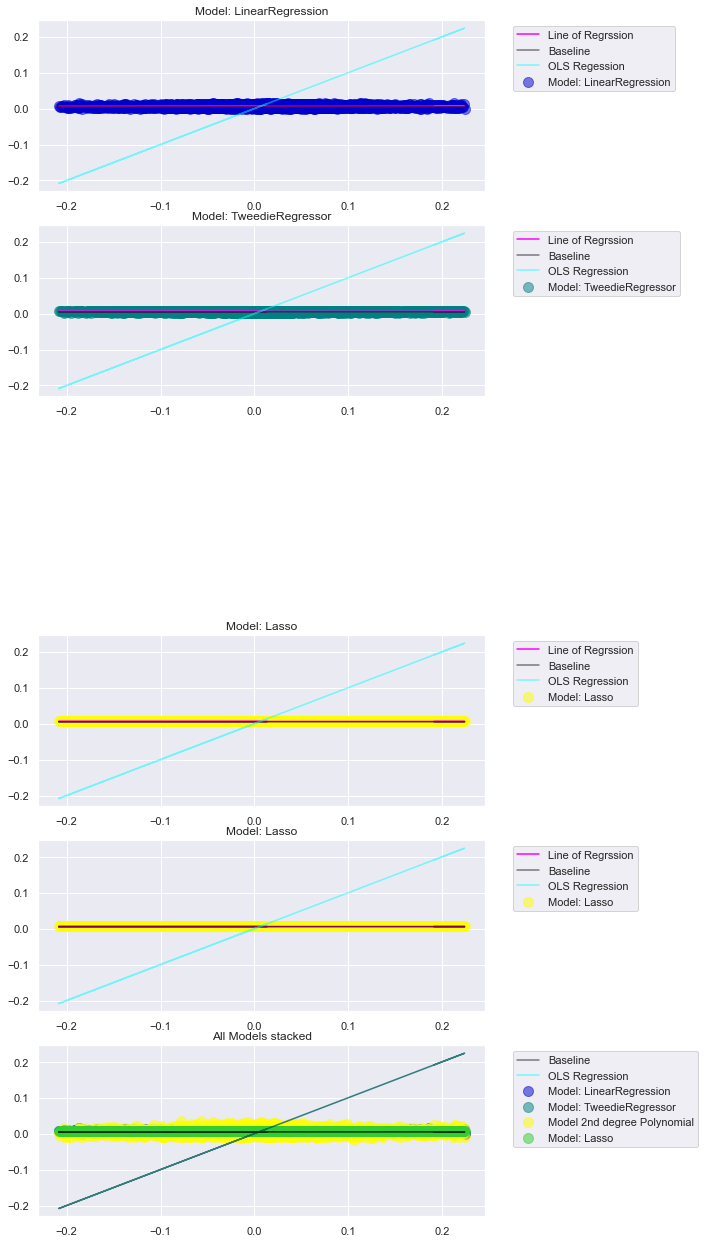

In [84]:
plt.subplots(6, 1, figsize=(8,22), sharey=True)
sns.set(style="darkgrid")
plt.subplot(6,1,1)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm, 
            alpha=.5, color="mediumblue", s=100, label="Model: LinearRegression")
m, b = np.polyfit(y_validate.logerror, y_validate.logerror_pred_lm, 1)
plt.plot(y_validate.logerror, m*y_validate.logerror+b, color='fuchsia', label='Line of Regrssion')
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='Baseline')
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="cyan", label='OLS Regession')
plt.title('Model: LinearRegression')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(6,1,2)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_glm, 
            alpha=.5, color="teal", s=100, label="Model: TweedieRegressor")
m, b = np.polyfit(y_validate.logerror, y_validate.logerror_pred_glm, 1) 
plt.plot(y_validate.logerror, m*y_validate.logerror+b, color='fuchsia', label='Line of Regrssion')
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='Baseline')
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="cyan", label='OLS Regression')
plt.title('Model: TweedieRegressor')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(6,1,3)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm, 
            alpha=.5, color="limegreen", s=100, label="Model 2nd degree Polynomial")
m, b = np.polyfit(y_validate.logerror, y_validate.logerror_pred_lm2, 1) 
plt.plot(y_validate.logerror, m*y_validate.logerror+b, color='fuchsia', label='Line of Regrssion')
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='Baseline')
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="cyan", label='OLS Regression')
plt.title('Model 2nd degree Polynomial')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(5,1,3)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm3, 
            alpha=.5, color="limegreen", s=100, label="Model 3rd degree Polynomial")
m, b = np.polyfit(y_validate.logerror, y_validate.logerror_pred_lm3, 1) 
plt.plot(y_validate.logerror, m*y_validate.logerror+b, color='fuchsia', label='Line of Regrssion')
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='Baseline')
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="cyan", label='OLS Regression')
plt.title('Model 2nd degree Polynomial')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(6,1,4)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lars, 
            alpha=.5, color="yellow", s=100, label="Model: Lasso")
m, b = np.polyfit(y_validate.logerror, y_validate.logerror_pred_lars, 1) 
plt.plot(y_validate.logerror, m*y_validate.logerror+b, color='fuchsia', label='Line of Regrssion')
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='Baseline')
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="cyan", label='OLS Regression')
plt.title('Model: Lasso')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(6,1,5)
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lars, 
            alpha=.5, color="yellow", s=100, label="Model: Lasso")
m, b = np.polyfit(y_validate.logerror, y_validate.logerror_pred_lars, 1) 
plt.plot(y_validate.logerror, m*y_validate.logerror+b, color='fuchsia', label='Line of Regrssion')
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='Baseline')
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="cyan", label='OLS Regression')
plt.title('Model: Lasso')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.subplot(6,1,6)
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='Baseline')
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="cyan", label='OLS Regression')
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm, 
            alpha=.5, color="mediumblue", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_glm, 
            alpha=.5, color="teal", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm2, 
            alpha=.5, color="yellow", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_lars, 
            alpha=.5, color="limegreen", s=100, label="Model: Lasso")
plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='_nolegend_')
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="black", label='_nolegend_')
plt.title('All Models stacked')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [85]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train_mean, 6), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_mean, 6))
print("--------------------------------------------------------------")
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train_medium, 6), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_medium, 6))
print("--------------------------------------------------------------")
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_lm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)
print("--------------------------------------------------------------")
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)
print("--------------------------------------------------------------")
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train_glm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)
print("--------------------------------------------------------------")
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_lm2, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm2)
print("--------------------------------------------------------------")
print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", rmse_train_lm3, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm3)

RMSE using Mean
Train/In-Sample:  0.060919 
Validate/Out-of-Sample:  0.060698
--------------------------------------------------------------
RMSE using Median
Train/In-Sample:  0.060927 
Validate/Out-of-Sample:  0.06071
--------------------------------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  0.060845949008003455 
Validation/Out-of-Sample:  0.0606597617286153
--------------------------------------------------------------
RMSE for Lasso + Lars
Training/In-Sample:  0.001855564858174907 
Validation/Out-of-Sample:  0.0018420985277198064
--------------------------------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.0018549848464980514 
Validation/Out-of-Sample:  0.0018415692770739663
--------------------------------------------------------------
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.001837987716062547 
Validation/Out-of-Sample:  0.0018382154402148774
---------------------

# Scatter Plot